# 3 - Exemplo de Construção de Redes

In [60]:
import graph_tool_extras as gte
import pandas as pd
import csv

## Introdução

Para conduzir este notebook, vamos considerar o objetivo de construir uma rede baseada em partidas do *Campeonato Brasileiro de Futebol.*

Em particular, vamos considerar o arquivo abaixo, que pertence ao dataset [Campeonato Brasileiro de futebol](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol), disponível no [Kaggle](https://www.kaggle.com/).

In [61]:
PATH = 'df_final.csv'

## Leitura dos dados em memória

Na melhor das situações, o arquivo é pequeno o suficiente para caber em memória e está em um formato suportado pelo [pandas](https://pandas.pydata.org/), como é justamente o caso do CSV.

In [62]:
df = pd.read_csv(PATH)

In [63]:
len(df)

100000

Nesse caso, podemos usar o método `head` para examinar as primeiras linhas e entender a organização dos dados.

In [64]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,IMDb_URL,genres,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,Crime|Film-Noir|Mystery|Thriller,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,Children|Comedy,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,Drama|Romance|War|Western,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,Crime|Drama,47,M,educator,55113


In [65]:
df = df.loc[df["genres"] != "unknown", :]

In [66]:
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,IMDb_URL,genres,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,Crime|Film-Noir|Mystery|Thriller,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,Children|Comedy,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,Drama|Romance|War|Western,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,Crime|Drama,47,M,educator,55113


In [67]:
df.movie_id

0         242
1         302
2         377
3          51
4         346
         ... 
99995     476
99996     204
99997    1090
99998     225
99999     203
Name: movie_id, Length: 99990, dtype: int64

É possível, no entanto, que o arquivo esteja em um formato que nenhuma biblioteca suporta. Nesse caso, podemos usar os métodos `readline` e `readlines` do Python...

In [68]:
with open(PATH) as file:

    # Ignora a primeira linha, pois ela é o cabeçalho.
    file.readline()

    # Armazena as linhas seguintes como lista de strings.
    lines = file.readlines()

...mas isso apenas separa o arquivo em linhas. 

In [69]:
# Para não sobrecarregar este notebook, vamos usar um
# slice para imprimir apenas as cinco primeiras linhas.
for line in lines[:5]:
    print(line)

0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105

1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Confidential+(1997),Crime|Film-Noir|Mystery|Thriller,39,F,executive,00000

2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%20(1994),Children|Comedy,25,M,writer,40206

3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%20the%20Fall%20(1994),Drama|Romance|War|Western,28,M,technician,80525

4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-119396,Crime|Drama,47,M,educator,55113



Para extrair dados dessas linhas, devemos entender o formato delas e implementar um *parsing* do zero.

In [70]:
# Para não sobrecarregar este notebook, vamos usar um
# slice para imprimir apenas as cinco primeiras linhas.
for line in lines[:5]:

    # Separa a linha em partes, usando
    # o caractere ',' como separador.
    parts = line.split(',')

    # Ignora o primeiro e último caracteres
    # de cada parte, para eliminar as aspas.
    parts = [part[1:-1] for part in parts]

    # Imprime a data, o mandante e o visitante.
    print(parts[2], parts[4], parts[5])

4 8125094 olya (1996
0 9171774 .A. Confidential (1997
7 7888711 eavyweights (1994
 8060692 egends of the Fall (1994
4 8639759 ackie Brown (1997


## Leitura dos dados em disco

Em muitas situações, por outro lado, o arquivo é grande demais para caber em memória. Nesses casos, é necessário processar esse arquivo linha por linha, sem nunca carregá-lo inteiro.

Dependendo do formato, o *parsing* dessas linhas pode ser feito por uma biblioteca. Novamente, esse é justamente o caso do CSV: podemos usar a função `reader` do módulo [csv](https://docs.python.org/3/library/csv.html).

In [71]:
with open(PATH) as file:
    reader = csv.reader(file)

    # Para não sobrecarregar este notebook, vamos usar um contador
    # e um break para imprimir apenas as cinco primeiras linhas.
    i = 0

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in reader:

        # Imprime a data, o mandante e o visitante.
        print(line[2], line[4], line[5])

        # Para não sobrecarregar este notebook, vamos usar um contador
        # e um break para imprimir apenas as cinco primeiras linhas.
        i += 1
        if i == 5:
            break

242 881250949 Kolya (1996)
302 891717742 L.A. Confidential (1997)
377 878887116 Heavyweights (1994)
51 880606923 Legends of the Fall (1994)
346 886397596 Jackie Brown (1997)


Na pior das situações, o arquivo é grande e está em um formato não suportado. Nessa situação, infelizmente, devemos implementar praticamente tudo do zero.

In [72]:
with open(PATH) as file:

    # Para não sobrecarregar este notebook, vamos usar um contador
    # e um break para imprimir apenas as cinco primeiras linhas.
    i = 0

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(file)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in file:

        # Transforma a linha em uma lista de partes,
        # considerando o caractere ',' como separador.
        parts = line.split(',')

        # Ignora o primeiro e último caracteres
        # de cada parte, para eliminar as aspas.
        parts = [part[1:-1] for part in parts]

        # Imprime a data, o mandante e o visitante.
        print(parts[2], parts[4], parts[5])

        # Para não sobrecarregar este notebook, vamos usar um contador
        # e um break para imprimir apenas as cinco primeiras linhas.
        i += 1
        if i == 5:
            break

4 8125094 olya (1996
0 9171774 .A. Confidential (1997
7 7888711 eavyweights (1994
 8060692 egends of the Fall (1994
4 8639759 ackie Brown (1997


## Fazendo gráfico de distribuição

     Gênero 1   Gênero 2  Contagem
0      Action  Adventure     10305
14     Action   Thriller     10100
103     Drama    Romance      8017
13     Action     Sci-Fi      7968
70     Comedy    Romance      7542
..        ...        ...       ...
137   Musical    Western         0
141   Mystery        War         0
142   Mystery    Western         0
149    Sci-Fi    Western         0
151  Thriller    Western         0

[153 rows x 3 columns]


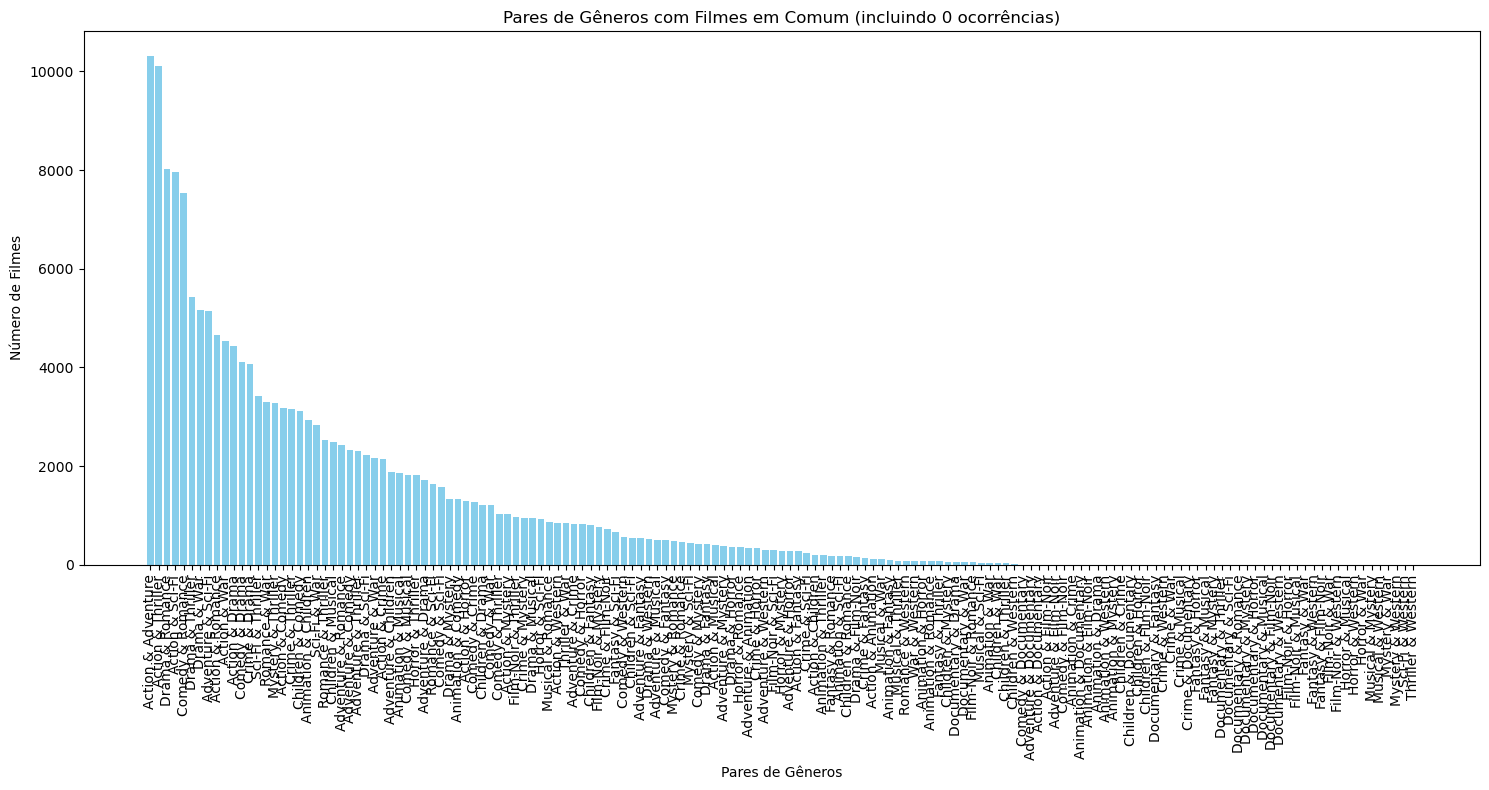

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Dicionário para armazenar a contagem dos pares de gêneros
pair_counts = {}

# Conjunto para armazenar todos os gêneros encontrados
all_genres = set()

# Itera por cada filme único para contar os pares de gêneros
for genres_str in df['genres']:
    # Separa os gêneros e remove entradas indesejadas
    genres = [g.strip() for g in genres_str.split('|') if g.strip() != "(no genres listed)"]
    # Ordena os gêneros para garantir consistência (evitar duplicatas invertidas)
    genres = sorted(genres)
    
    # Adiciona os gêneros do filme ao conjunto total
    all_genres.update(genres)
    
    # Se o filme tiver pelo menos dois gêneros, gera os pares
    if len(genres) >= 2:
        for pair in itertools.combinations(genres, 2):
            pair_counts[pair] = pair_counts.get(pair, 0) + 1

# Gera todos os pares possíveis a partir do conjunto total de gêneros
all_possible_pairs = list(itertools.combinations(sorted(all_genres), 2))

# Cria uma lista de dicionários para incluir todos os pares,
# atribuindo 0 para aqueles que não aparecem na contagem
all_pairs_data = [
    {'Gênero 1': pair[0], 'Gênero 2': pair[1], 'Contagem': pair_counts.get(pair, 0)}
    for pair in all_possible_pairs
]

# Converte a lista para um DataFrame e ordena (por exemplo, decrescente pela contagem)
df_all_pairs = pd.DataFrame(all_pairs_data)
df_all_pairs = df_all_pairs.sort_values(by='Contagem', ascending=False)

# Exibe todos os pares no console
print(df_all_pairs)

# Plota um gráfico de barras para visualizar todos os pares
plt.figure(figsize=(15,8))
plt.bar(range(len(df_all_pairs)), df_all_pairs['Contagem'], color='skyblue')
plt.xticks(
    range(len(df_all_pairs)), 
    [f"{row['Gênero 1']} & {row['Gênero 2']}" for _, row in df_all_pairs.iterrows()], 
    rotation=90, ha='center'
)
plt.xlabel('Pares de Gêneros')
plt.ylabel('Número de Filmes')
plt.title('Pares de Gêneros com Filmes em Comum (incluindo 0 ocorrências)')
plt.tight_layout()
plt.show()

   
    


In [46]:
# Cria um dicionário apenas com os pares que têm contagem maior ou igual a 2
filtered_pair_counts = {pair: count for pair, count in pair_counts.items() if count >= 2}

# Exibe o dicionário filtrado
print(filtered_pair_counts)


{('Crime', 'Film-Noir'): 721, ('Crime', 'Mystery'): 955, ('Crime', 'Thriller'): 3157, ('Film-Noir', 'Mystery'): 766, ('Film-Noir', 'Thriller'): 974, ('Mystery', 'Thriller'): 3270, ('Children', 'Comedy'): 3122, ('Drama', 'Romance'): 8017, ('Drama', 'War'): 5162, ('Drama', 'Western'): 520, ('Romance', 'War'): 3292, ('Romance', 'Western'): 81, ('War', 'Western'): 81, ('Crime', 'Drama'): 4067, ('Sci-Fi', 'War'): 2824, ('Action', 'Thriller'): 10100, ('Adventure', 'Children'): 1882, ('Adventure', 'Romance'): 2424, ('Children', 'Romance'): 178, ('Comedy', 'Musical'): 1826, ('Comedy', 'Romance'): 7542, ('Musical', 'Romance'): 877, ('Action', 'Adventure'): 10305, ('Action', 'Comedy'): 3176, ('Action', 'Sci-Fi'): 7968, ('Adventure', 'Comedy'): 2322, ('Adventure', 'Sci-Fi'): 5135, ('Comedy', 'Sci-Fi'): 1577, ('Action', 'Crime'): 2150, ('Adventure', 'Crime'): 826, ('Comedy', 'Crime'): 1270, ('Adventure', 'Thriller'): 2304, ('Animation', 'Children'): 2932, ('Animation', 'Comedy'): 1328, ('Animation

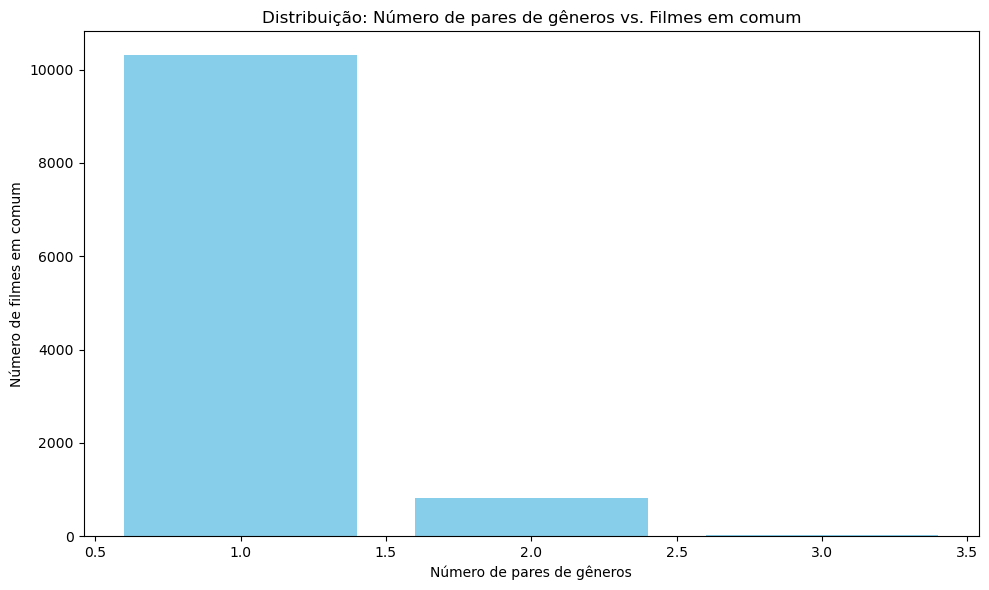

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter

# Dicionário para armazenar a contagem dos pares de gêneros
pair_counts = {}

# Processa cada filme único: separa os gêneros, ordena e gera os pares
for genres_str in df['genres']:
    genres = [g.strip() for g in genres_str.split('|') if g.strip() != "(no genres listed)"]
    genres = sorted(genres)
    
    if len(genres) >= 2:
        for pair in itertools.combinations(genres, 2):
            pair_counts[pair] = pair_counts.get(pair, 0) + 1

# Cria uma distribuição: para cada número de filmes em comum, quantos pares de gêneros têm essa contagem
distribution = Counter(pair_counts.values())

# Converte a distribuição para um DataFrame
# Aqui, 'Filmes em comum' é a quantidade de filmes que os pares compartilham
# e 'Número de pares' é a quantidade de pares que possuem essa co-ocorrência.
df_distribution = pd.DataFrame(list(distribution.items()), columns=['Filmes em comum', 'Número de pares'])
# Ordena pelo número de pares (ou você pode ordenar por 'Filmes em comum')
df_distribution = df_distribution.sort_values(by='Número de pares')
df_distribution["normalize"] = df_distribution["Número de pares"] / len(df_distribution)

# Plota o gráfico de barras vertical com os eixos invertidos:
# - Eixo x: Número de pares de gêneros
# - Eixo y: Número de filmes em comum
plt.figure(figsize=(10,6))
plt.bar(df_distribution['Número de pares'], df_distribution['Filmes em comum'], color='skyblue')
plt.xlabel("Número de pares de gêneros")
plt.ylabel("Número de filmes em comum")
plt.title("Distribuição: Número de pares de gêneros vs. Filmes em comum")
plt.tight_layout()
plt.show()


In [48]:
df_distribution.head()

,Filmes em comum,Número de pares,normalize
0,721,1,0.009804
1,955,1,0.009804
2,3157,1,0.009804
3,766,1,0.009804
4,974,1,0.009804


In [49]:
df_distribution["Número de pares"].value_counts()

Número de pares
1    99
2     2
3     1
Name: count, dtype: int64

In [50]:
df["year"].max()

KeyError: 'year'

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a release_date column
df['year'] = df['release_date'].dt.year

# Create histogram
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

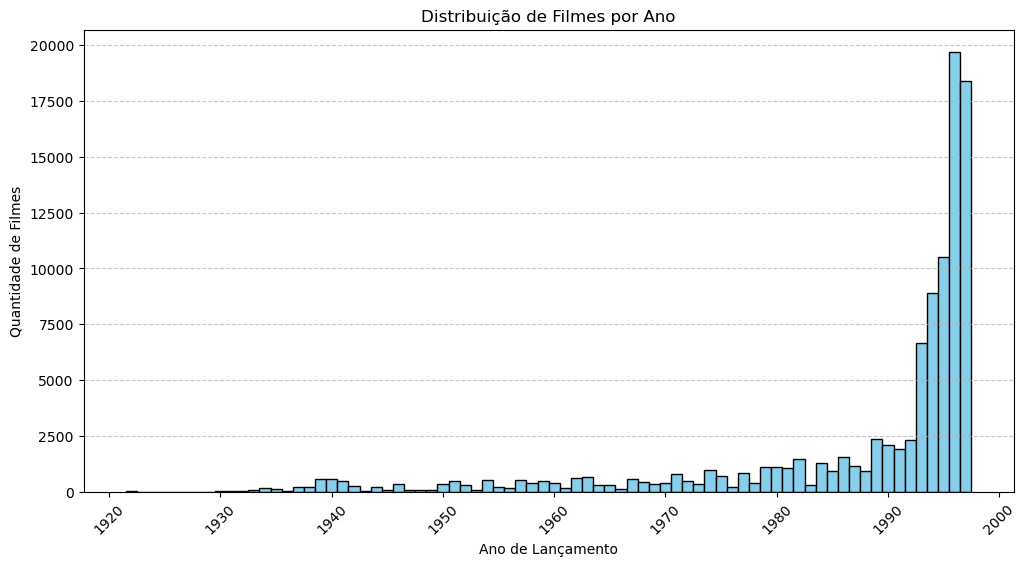

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter para datetime e extrair o ano
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year

# Contar filmes por ano corretamente
film_counts = df["year"].value_counts().sort_index()

# Plotar o histograma
plt.figure(figsize=(12, 6))
plt.hist(df["year"].dropna(), bins=range(int(df["year"].min()), int(df["year"].max()) + 1), 
         color="skyblue", edgecolor="black", align="left")

plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Filmes")
plt.title("Distribuição de Filmes por Ano")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Construção de um novo grafo

Para construir e analisar grafos, vamos usar a biblioteca [graph-tool](https://graph-tool.skewed.de/), com alguns adicionais disponíveis no módulo `graph_tool_extras`.

O uso básico dessa plataforma é simples:

* para criar um grafo, basta chamar a classe `gte.Graph`; *(o parâmetro booleano `directed`, que é falso por padrão, define se ele é dirigido)*
 
* para adicionar um vértice a esse grafo, basta chamar o método `add_vertex_by_id`, passando o identificador desse vértice; *(inteiro ou string)*

* para adicionar uma aresta, basta chamar o método `add_edge_by_ids`, passando os identificadores da origem e do destino.

Ou seja, para construir o primeiro exemplo do primeiro notebook, basta rodar o código abaixo.

In [85]:
g = gte.Graph(directed=False) # igual a gte.Graph(), pois directed é falso por padrão
g.add_vp("color")
g.add_vp("name")

genres = [
    "Action", "Adventure", "Animation", "Children", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]

for genre in genres:
    v = g.add_vertex_by_id(genre)
    v["name"] = genre
    v["color"] = 0xFF0000

for movie_id in set(df["movie_id"]):
    list_genres_temp = []
    g.add_vertex_by_id(movie_id)
    
    genres_by_movie = df.loc[df["movie_id"] == movie_id, :].values.tolist()[0][7].split("|")

    for genre in genres_by_movie:
        g.add_edge_by_ids(movie_id, genre)
        list_genres_temp.append(genre)

    # for i in range(len(list_genres_temp)):
    #     for j in range(i + 1, len(list_genres_temp)):
    #         g.add_edge_by_ids(list_genres_temp[i], list_genres_temp[j])
        
    # for pair, count in filtered_pair_counts.items():
    #     genre1, genre2 = pair
    #     g.add_edge_by_ids(genre1, genre2)

g

<Graph object, undirected, with 1698 vertices and 2891 edges, 3 internal vertex properties, at 0x7f11db6320d0>

## Iteração e acesso a vértices

Para iterar sobre os vértices de um grafo, basta chamar o método `vertices`.

Para acessar o identificador de um vértice, basta chamar o método `id`.

In [86]:
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,IMDb_URL,genres,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),Comedy,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,Crime|Film-Noir|Mystery|Thriller,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,Children|Comedy,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,Drama|Romance|War|Western,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,Crime|Drama,47,M,educator,55113


In [87]:
genres_by_movie = df.loc[df["movie_id"] == movie_id, :].values.tolist()[0]
genres_by_movie

[916,
 1682,
 3,
 880845755,
 'Scream of Stone (Schrei aus Stein) (1991)',
 '08-Mar-1996',
 'http://us.imdb.com/M/title-exact?Schrei%20aus%20Stein%20(1991)',
 'Drama',
 27,
 'M',
 'engineer',
 'N2L5N']

In [12]:
for u in g.vertices():
    print(u.id())

a
b
c
d


Para acessar um vértice específico, basta chamar o método `vertex_by_id`, passando o identificador desse vértice.

In [13]:
u = g.vertex_by_id('a')

Para iterar sobre as arestas de um grafo, basta chamar o método `edges`.

Para acessar a origem de uma aresta, basta chamar o método `source`.

Para acessar o destino de uma aresta, basta chamar o método `target`.

In [14]:
for e in g.edges():
    print(e.source().id(), e.target().id())

a b
a c
b c
b d
c b
c d


Para acessar uma aresta específica, basta chamar o método `edge_by_ids`, passando os identificadores da origem e do destino.

In [15]:
e = g.edge_by_ids('a', 'b')

## Armazenamento de valores

A plataforma permite armazenar valores em cada vértice, em cada aresta e no próprio grafo. Esses valores podem ser qualquer coisa: inteiros, strings, listas, dicionários...

### Propriedades de vértice

Um vértice é mais ou menos como um dicionário: para armazenar um valor nele, devemos associar esse valor a uma chave.

A atribuição abaixo, por exemplo, associa o inteiro `1` à chave `'x'` do vértice `u`.

``` python
u['x'] = 1
```

Porém, para evitar problemas de consistência, não é permitido que um vértice tenha uma chave e outro não. No exemplo acima, há somente duas possibilidades: ou *nenhum* vértice tem a chave `'x'` (ou seja, a atribuição com certeza daria erro), ou *todos* têm (ou seja, a atribuição com certeza iria funcionar). Nesse caso, dizemos que o grafo tem uma **propriedade de vértice** *(vertex property)* chamada `'x'`.

Para adicionar essa propriedade de vértice ao grafo, devemos chamar o método `add_vp`, passando sua chave.

In [16]:
g.add_vp('x')

Se a propriedade existe, tanto a leitura quanto a escrita de valores são análogas às de um dicionário.

In [17]:
u['x'] = 1

u['x']

1

### Propriedades de aresta

Assim como um grafo pode ter uma propriedade de vértice, ele também pode ter uma **propriedade de aresta** *(edge property).* Para adicioná-la, basta chamar o método `add_ep`.

In [18]:
g.add_ep('y')

Novamente, se a propriedade existe, tanto a leitura quanto a escrita de valores são análogas às de um dicionário.

A atribuição abaixo associa a string `'s'` à chave `'y'` da aresta `e`.

In [19]:
e['y'] = 's'

e['y']

's'

### Propriedades de grafo

Por fim, um grafo pode ter uma propriedade dele próprio, ou seja, uma **propriedade de grafo** *(graph property).* Para adicionar, basta chamar `add_gp`.

In [20]:
g.add_gp('z')

A atribuição abaixo associa a lista `[1, 's']` à chave `'z'` do grafo `g`.

In [21]:
g['z'] = [1, 's']

g['z']

[1, 's']

## Salvamento de grafo em arquivo

Para salvar um grafo em um arquivo, basta chamar a função `gte.save`, passando o grafo e o caminho do arquivo.

Se o grafo tem propriedades de vértice, aresta ou dele próprio, elas também são salvas.

In [88]:
gte.save(g, 'movies4.net.gz')

In [89]:
import netpixi

from graph_tool import draw

In [90]:
g = gte.load("movies4.net.gz")

layout = draw.sfdp_layout(g)

gte.move(g, layout)

gte.save(g, "movies_reposicionado4.net.gz")

In [93]:
r =  netpixi.render("movies_reposicionado4.net.gz", infinite=True)

In [95]:
r.vertex_set_key("name")

In [ ]:
g = gte.load("movies_reposicionado4.net.gz")

## Conclusão

Vamos usar as seções anteriores para construir a seguinte rede:

* os vértices são os times que participaram do campeonato de um ano específico; *(os identificadores são os nomes desses times)*
* uma aresta de A a B indica que o time A ganhou do time B em pelo menos uma partida desse campeonato.

Como a relação "A ganhou de B" não é simétrica, devemos criar uma rede dirigida.

In [23]:
g = gte.Graph(directed=True)

Usando propriedades, vamos armazenar três informações adicionais na rede:

* saldo de gols de cada time; *(propriedade de vértice)*
* total de vitórias de cada um dos times sobre cada um dos outros; *(propriedade de aresta)*
* ano escolhido. *(propriedade de grafo)*

In [24]:
g.add_vp('saldo')
g.add_ep('total')
g.add_gp('ano')

Para usar dados específicos, vamos escolher o ano de 2022.

In [25]:
YEAR = 2022

g['ano'] = YEAR

Antes de ler o arquivo, vamos definir uma função auxiliar que recebe um grafo e um identificador e:

* se um vértice com esse identificador já existe no grafo, simplesmente devolve esse vértice;

* senão, adiciona um vértice com esse identificador ao grafo, inicializa o saldo desse vértice e o devolve.

Para isso, vamos usar dois fatos úteis:

1. se um vértice com o identificador não existe, o método `vertex_by_id` devolve `None`;

2. o método `add_vertex_by_id` devolve o vértice adicionado.

In [26]:
def get_or_add_vertex(g, id):
    u = g.vertex_by_id(id)
    if u is None:
        u = g.add_vertex_by_id(id)
        u['saldo'] = 0
    return u

Vamos definir também uma função auxiliar que recebe um grafo e dois identificadores e:

* se os vértices com esses identificadores já estão conectados no grafo, simplesmente devolve a aresta correspondente a eles;

* senão, adiciona uma aresta correspondente a esses identificadores ao grafo, inicializa o total dessa aresta e a devolve.

Vamos usar dois fatos análogos aos da função anterior:

1. se uma aresta correspondente aos identificadores não existe, o método `edge_by_ids` devolve `None`;

2. o método `add_edge_by_ids` devolve a aresta adicionada.

In [27]:
def get_or_add_edge(g, winner, loser):
    e = g.edge_by_ids(winner, loser)
    if e is None:
        e = g.add_edge_by_ids(winner, loser)
        e['total'] = 0
    return e

Agora estamos prontos para ler o arquivo e construir a rede.

In [28]:
with open(PATH) as file:
    reader = csv.reader(file)

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    for line in reader:

        # Considera apenas partidas de 2022.
        date = line[2]
        index = date.rfind('/')
        year = int(date[(index + 1):])
        if year == YEAR:

            # Lê os nomes dos times mandante e visitante.
            home = line[4]
            guest = line[5]

            # Lê os placares dos times mandante e visitante.
            score_home = int(line[12])
            score_guest = int(line[13])

            # Obtém vértices, adicionando se não existirem.
            u = get_or_add_vertex(g, home)
            v = get_or_add_vertex(g, guest)

            # Atualiza saldos dos vértices.
            u['saldo'] += score_home
            v['saldo'] += score_guest

            # Considera apenas partidas em que não houve empate.
            if score_home != score_guest:

                # Obtém aresta, adicionando se não existir.
                if score_home < score_guest:
                    e = get_or_add_edge(g, guest, home)
                else:
                    e = get_or_add_edge(g, home, guest)

                # Atualiza total da aresta.
                e['total'] += 1

Para concluir, basta salvar a rede em um arquivo.

In [8]:
gte.save(g, 'movies.net.gz')

<div class="alert alert-block alert-info">
   <strong>DICA:</strong> Você pode clicar na aba
   
   à esquerda para navegar por seção.
</div>

In [16]:
import netpixi

from graph_tool import draw

In [17]:
g = gte.load("movies.net.gz")

layout = draw.sfdp_layout(g)

gte.move(g, layout)

gte.save(g, "movies_reposicionado.net.gz")

In [18]:
netpixi.render("movies_reposicionado.net.gz")

In [19]:
len(genres) + len(set(df["movie_id"]))

1698

In [20]:
g.num_edges()

2891

In [21]:
g.num_vertices()

1698